**Titanic Data Analysis**

This is to show the EDA(Exploratory Data Analysis) of the Titanic dataset along with visualization.
The objective is to analyse the factors that influenced passenger survival. Through compelling visualizations and statistical techniques, we'll unearth hidden insights within the dataset.

EDA stands for Exploratory Data Analysis. In Python, it refers to the process of using Python libraries and techniques to investigate, analyze, and visualize data to understand its characteristics, patterns, and relationships.
It will have Observational summary, statistical summary, missing values and it's potential impact on the data.

After my analysis, we would able to observe and find certain answer to the questions such as “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

By the end, we will have a detailed visual and quantitative understanding of the Titanic's passenger data.

In [1]:
#import data and required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
 #Loading the file
titanic_df = pd.read_csv("/content/train.csv")

In [4]:
 #Displaying first five data using head()
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


here, the info() is displaying information regarding the data set in which the shape of the titanic_df DataFrame is 891 rows,12 columns(numeric col:7 and non numeric col:5) with their respective  datatype. Also we can observe that dataframe has few null values in Age,Cabin and Embarked col.

In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The describe()  is used to check the statistical summary of the dataframe.
Survived col is an indicator where 1 represents survival and 0 represents non-survival. It is showing clear  that around 38.4% of passengers (mean survival rate of 0.38) managed to survive,suggesting that less than half of the passengers survived.

The average passenger class (Pclass) sits at 2.3, indicating that most passengers belonged to the second or third class, with fewer in the more luxurious first class.

The youngest passenger was a mere infant (0.42 years old), while the oldest was a seasoned traveler of 80 years.

In [7]:
#Looking for null values in the dataset
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic_df.isnull().sum().sum()

866

here, we have calculated total number of null values in the dataframe.
Age has 177 missing entries.
Cabin has 687 missing entries.
Embarked has 2 missing entries.

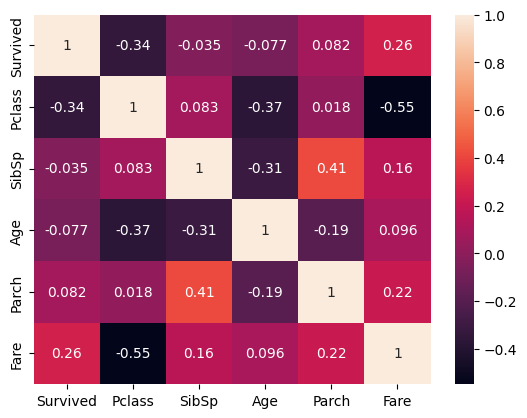

In [10]:
heatmap = sns.heatmap(titanic_df[['Survived', 'Pclass','SibSp','Age','Parch', 'Fare']].corr(), annot = True)

In [14]:
titanic_df['Survived'].unique()

array([0, 1])

In [15]:
titanic_df['Pclass'].unique()

array([3, 1, 2])

pclass col is the Ticket class,	1 = 1st class of ticket, 2 = 2nd, 3 = 3rd

In [16]:
titanic_df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [19]:
titanic_df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

Heatmap is used to visualize the correlation coefficients between the variables in a dataset.
Positive correlations (variables tend to move together) while while negative correlations (variables tend to move in opposite directions).
The intensity of the color would indicate the strength of the correlation, with darker colors representing stronger correlations. Additionally, numerical values within each square would likely represent the actual correlation coefficient between the corresponding features.
therefore,we analysed the variables:
Survived column has relation with Fare column, the relation is positive (0.26) meaning, more the fare, higher is the chances of survival.
likewise, we may compare variables and generate more insights.


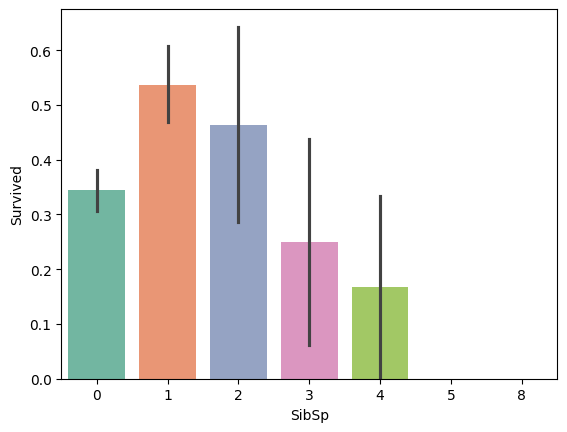

In [22]:
bar_sibsp = sns.barplot(data = titanic_df, x = 'SibSp', y = 'Survived',palette="Set2")
plt.show()

Passengers having more number of siblings are less likely to survive.

Passengers who are single or have 1 or 2 siblings are more likely to survive.

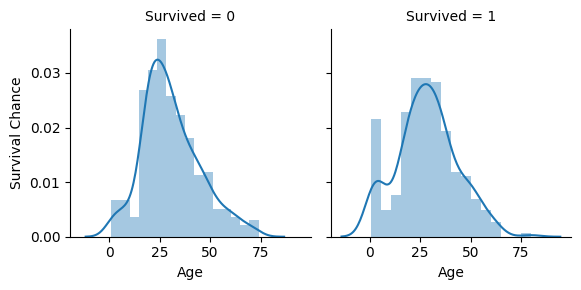

<Figure size 1000x800 with 0 Axes>

In [33]:
ageplot = sns.FacetGrid(titanic_df, col = 'Survived')
plt.figure(figsize = (10,8))
ageplot = ageplot.map(sns.distplot,'Age')
ageplot = ageplot.set_ylabels('Survival Chance')

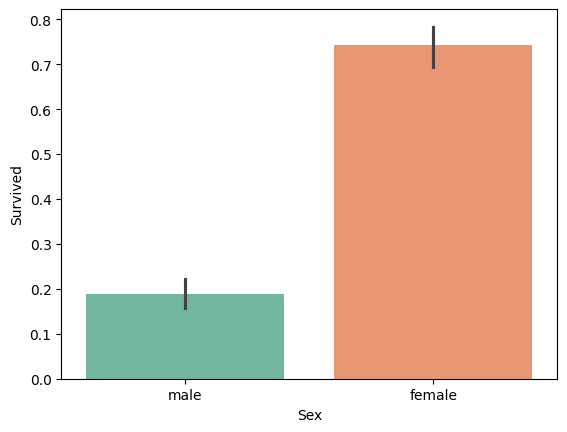

<Figure size 1000x200 with 0 Axes>

In [35]:
genderplot = sns.barplot(x = 'Sex',y = 'Survived',data = titanic_df,palette="Set2")
plt.figure(figsize = (10,2))
plt.show()


In [36]:
titanic_df[["Sex", "Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


we can see that Female has Higher Survival Rates than Male,as female were rescued first in the lifeboats.
So Sex played an important role during the evacuation process and hence women had more chances of survival.

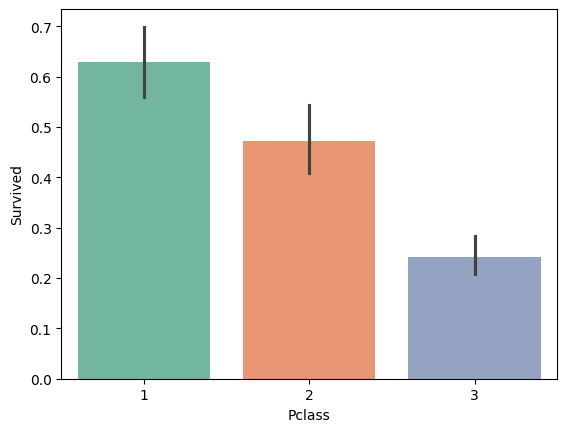

In [38]:
Pclassplot = sns.barplot(x = "Pclass",y = "Survived",data = titanic_df, palette="Set2")
plt.show()

The Passenger class increases, hence the chances of survival increases.

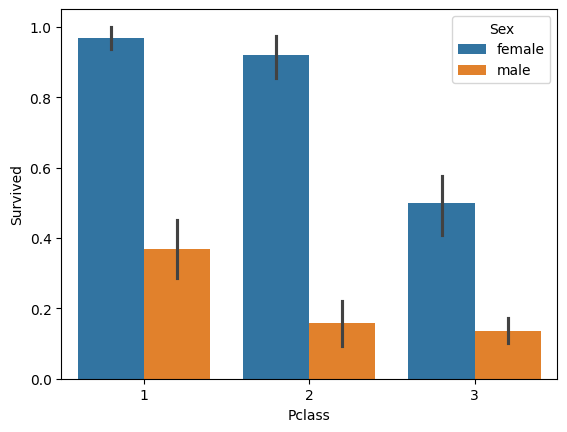

In [39]:
x = sns.barplot(x = "Pclass",y = "Survived",data = titanic_df, hue = "Sex")
plt.show()

Passenger having high class ticket(1st class) and also if gender is female , then most chances of survival has increased.

**Conclusion:**

Unequal Fate: Social Class and Demographics Shaped Survival on the Titanic dataset.

Our analysis reveals that survival on the RMS Titanic was far from random. Socio-economic factors, particularly passenger class, played a significant role alongside demographics like age, gender, and family ties.

Key Findings:

Gender and Age: Women and children exhibited higher survival rates, suggesting potential prioritization during the evacuation.

Social Class Divide: A clear correlation emerged between passenger class and survival. Passengers in the higher classes (first class) had a significantly better chance of surviving the disaster.

By highlighting these disparities, our investigation underscores the profound impact of social status, class, and demographics on survival outcomes during maritime tragedies like the Titanic disaster.